<table align="center" width=50%>
    <tr>
        <td>
            <div align="center">
                <font color="#7F0542 ">
                    <b><h1>Employee Attrition Prediction</h1>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement:
Create a ML model to which employees can leave company based on job type,employee information and other features to make better prediction about which employees will stay.

## Data Description:

#### FILE DESCRIPTION
==================================================  
 Our dataset contains these columns & their respective values -  
 
| Column Name | Categories/Range of Values |
|-------------|-------|
| Age | 18-60 |
| Attrition | Yes,No |
| BusinessTravel |'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'  |
| DailyRate | 102-1499 |
| Department | 'Human Resources', 'Research & Development', 'Sales' |
| DistanceFromHome | 1-29 |
| Education | 1-5 |
| EducationField | 'Human Resources', 'Life Sciences', 'Marketing', 'Medical','Other', 'Technical Degree' |
| EmployeeCount | 1 |
| EmployeeNumber | 1-2068 |
| EnvironmentSatisfaction | 1-4 |
| Gender | 'Female', 'Male' |
| HourlyRate | 30-100 |
| JobInvolvement | 1-4 |
| JobLevel | 1-5 |
| JobRole | 'Healthcare Representative', 'Human Resources','Laboratory Technician', 'Manager', 'Manufacturing Director','Research Director', 'Research Scientist', 'Sales Executive','Sales Representative' |
| JobSatisfaction | 1-4 |
| MaritalStatus | 'Divorced', 'Married', 'Single' |
| MonthlyIncome | 1099-19999 |
| MonthlyRate | 2049-26999 |
| NumCompaniesWorked | 0-9 |
| Over18 | Y |
| OverTime | No', 'Yes' |
| PercentSalaryHike | 11-25 |
| PerformanceRating | 3,4 |
| RelationshipSatisfaction | 1-4 |
| StandardHours | 80 |
| StockOptionLevel | 0-3 |
| TotalWorkingYears | 0-40 |
| TrainingTimesLastYear | 0-6 |
| WorkLifeBalance | 1-4 |
| YearsAtCompany | 0-40 |
| YearsInCurrentRole | 0-18 |
| YearsSinceLastPromotion | 0-15 |
| YearsWithCurrManager | 0-17 |




## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data & Data Formatting](#Read_Data)**
3. **[Exploratory Data Analysis](#data_preparation)**
4. **[Feature Engineering](#feature_eng)**
5. **[Model](#Model)**
    - 5.1 -[Over sampling](#sampling)
    - 5.2 -[Splitting data & Training](#train)
6. **[ Hyperparameter Tuning](#ht)**
    - 6.1 -[Randomized Search Cross Validation](#rsv)
    - 6.2 - [Grid Search Cross Validation](#grid)
    - 6.3 - [K-fold Cross Validation](#k-fold)
7. **[ Result ](#Result )**
    - 7.1 -[Performace Metrics](#rsv)
    - 7.2 - [Feature Importance](#feature)



# 1. Import Libraries <a id='import_lib'></a>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)
import warnings
from IPython.display import Markdown
warnings.filterwarnings('ignore')

In [2]:
#Setting up the options
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

# 2. Read Data & Data Formatting<a id='Read_Data'></a>

In [3]:
#reading the data
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# To show the first 2 row of data
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


# 3. Exploratory Data Analysis <a id='data_preparation'></a>

Basic Info of data

In [5]:
#check unique values in the column
print(df.apply(lambda col: col.unique().sum()))

Age                                                                      1677
Attrition                                                               YesNo
BusinessTravel                       Travel_RarelyTravel_FrequentlyNon-Travel
DailyRate                                                              710161
Department                         SalesResearch & DevelopmentHuman Resources
DistanceFromHome                                                          435
Education                                                                  15
EducationField              Life SciencesOtherMedicalMarketingTechnical De...
EmployeeCount                                                               1
EmployeeNumber                                                        1506552
EnvironmentSatisfaction                                                    10
Gender                                                             FemaleMale
HourlyRate                                                      

In [6]:
# Statistical summary of the  Numerical columns
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00


In [7]:
# Statistical summary of the  Categorical columns
df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [8]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  1470
No. of columns:  35


Our Dataset contains 35 columns 


Which contain 1 feature 'Attrition' which we are goin to predict.



Rest 34 are employee features which we are going to use

In [9]:
# To check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Above is all column in our dataset with their data types

### Missing Values

In [10]:
#Checking the null values in our dataset column wise. 
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

so luckily we  have **0 null values**.

In [11]:
# TO check value count of Attrition column
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

For attrition column the distribution of values is unequal between both categories.

In [12]:
# To check the number of duplicate rows
duplicate_rows = df[df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


There are **No Duplicate values** present in the dataset

Lets count plot all categorical variables to see what categories they have & in how much ratio

<Figure size 1500x1500 with 0 Axes>

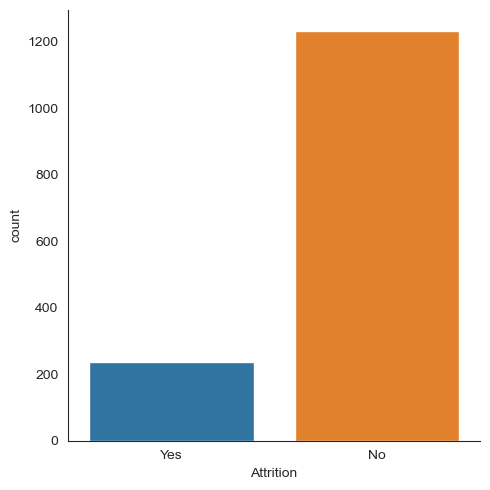

<Figure size 1500x1500 with 0 Axes>

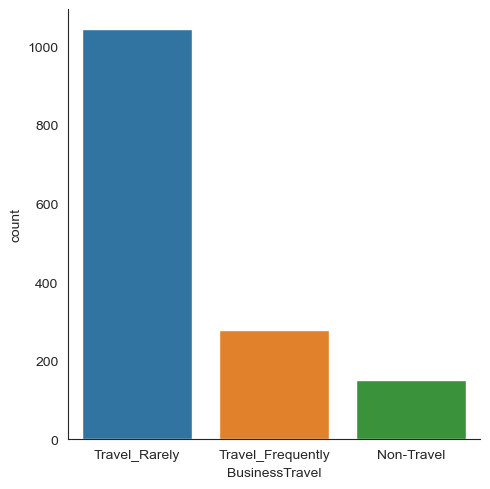

<Figure size 1500x1500 with 0 Axes>

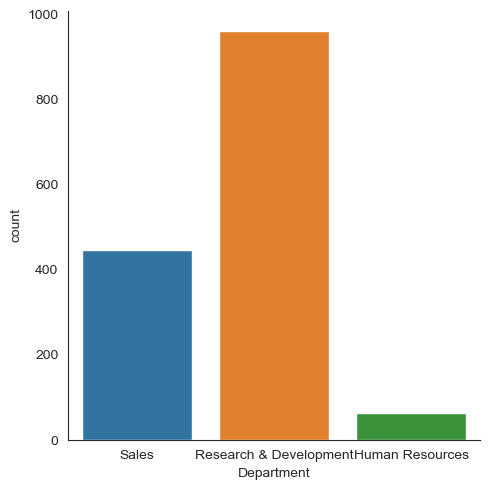

<Figure size 1500x1500 with 0 Axes>

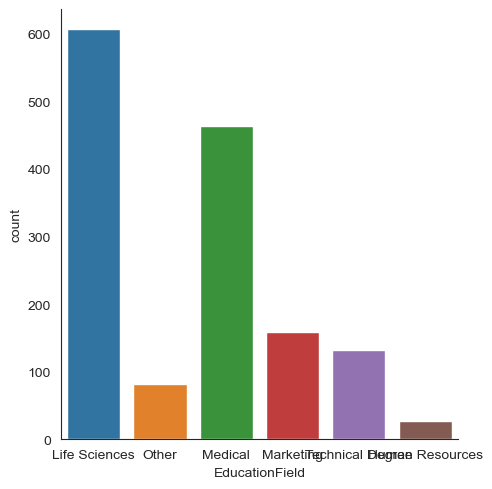

<Figure size 1500x1500 with 0 Axes>

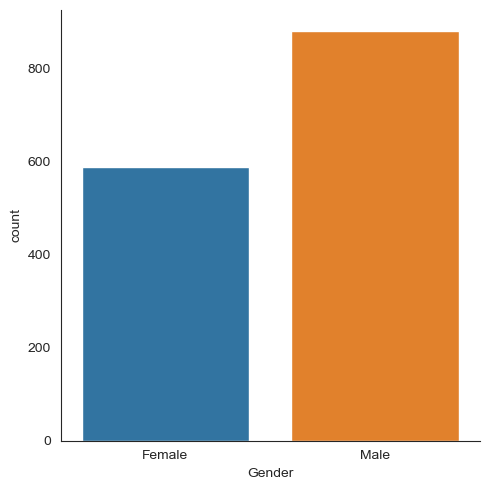

<Figure size 1500x1500 with 0 Axes>

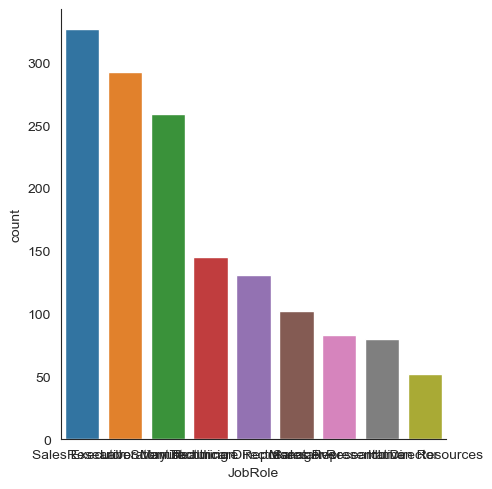

<Figure size 1500x1500 with 0 Axes>

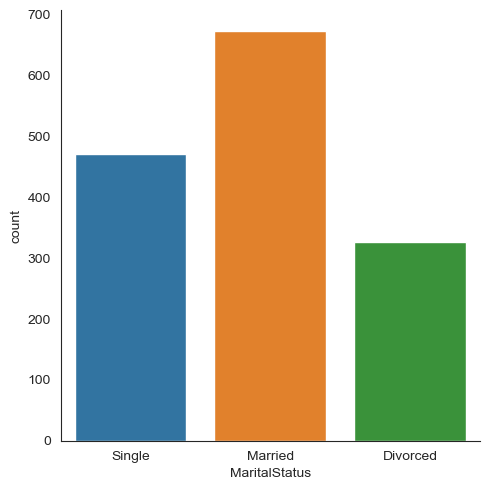

<Figure size 1500x1500 with 0 Axes>

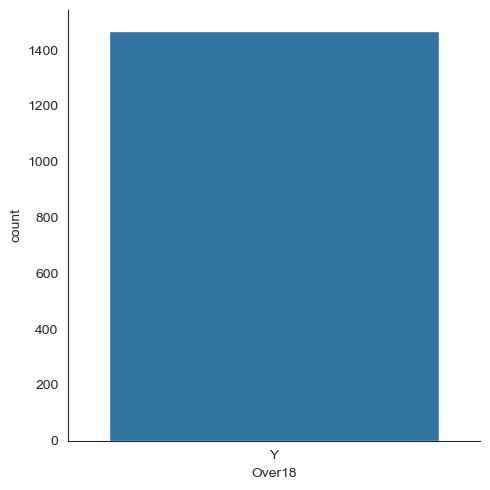

<Figure size 1500x1500 with 0 Axes>

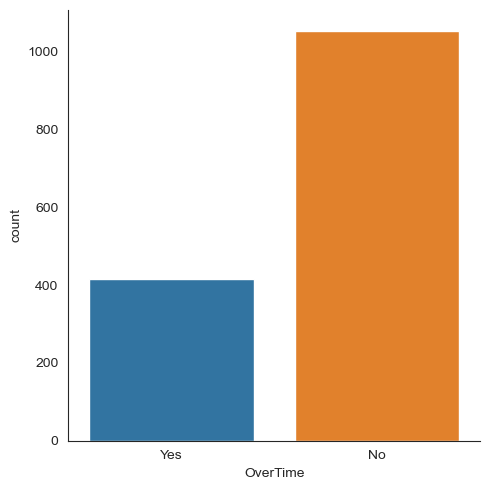

In [13]:
# Countplot for each categorical column
cat_df=df.select_dtypes(include='object')

for i in cat_df:
    plt.figure(figsize=(15, 15))
    sns.catplot(data=df,x=i,kind='count')

From above graph 'Over18' column can be dropped as it has only 1 value.
Based on 'Business Travel' ,'Maritial Staus', 'Department' , 'Job Type' we can analyze further.

Lets Plot histogram for  all column to see their distribution of values with respect to 'Attrition'  for all column

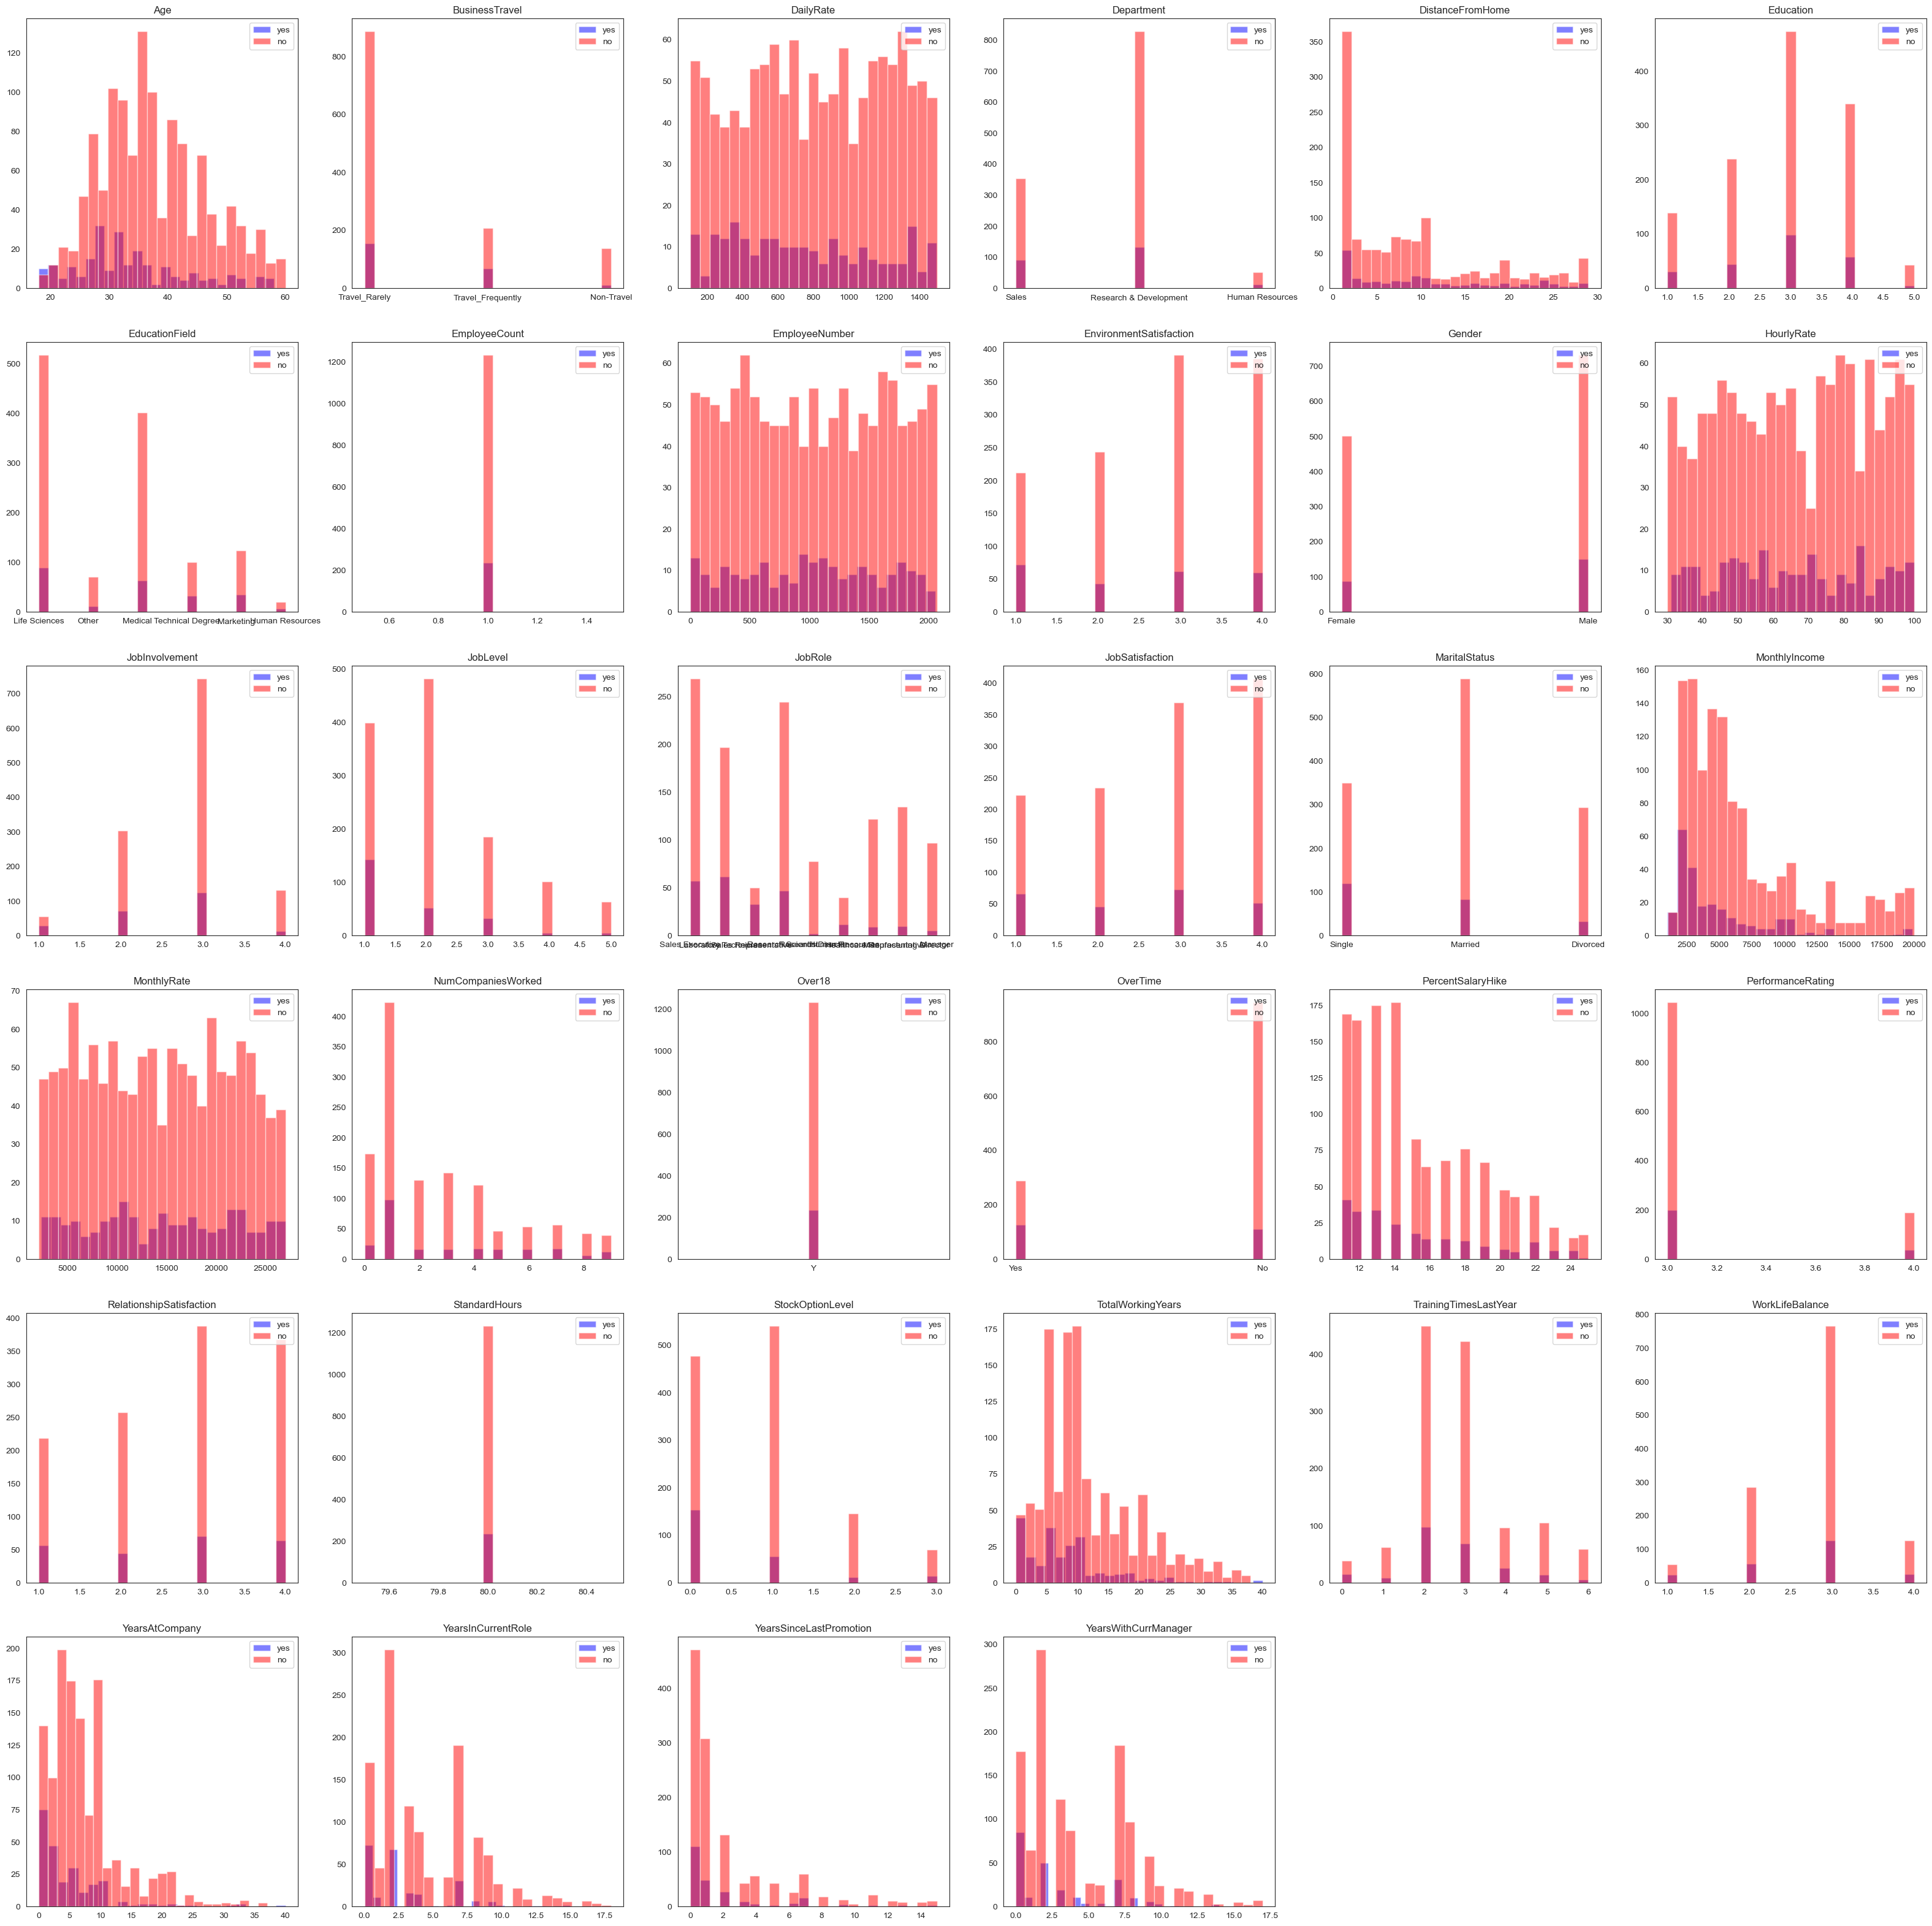

In [14]:
#Histogram for each  column with respect to Attrition
k=1
plt.figure(figsize=(40, 40))
for col in df:
  if col=="Attrition":
    continue
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(6, 6, k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='r')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

From above graph 'Over18','Standard Hours','employee Count' column can be dropped as it has only 1 value.
Also Outliers are very less.

Let's Plot Stacked Bar Chart vs attrition of diffrent column 

Text(0.5, 1.0, 'Stacked Bar Chart of Job satisfaction vs attrition')

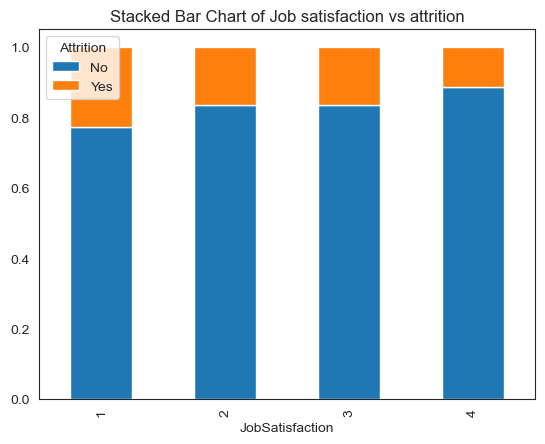

In [15]:
# Stacked bar chart of Job satisfaction vs attrition
table=pd.crosstab(df.JobSatisfaction, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job satisfaction vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Overtime vs attrition')

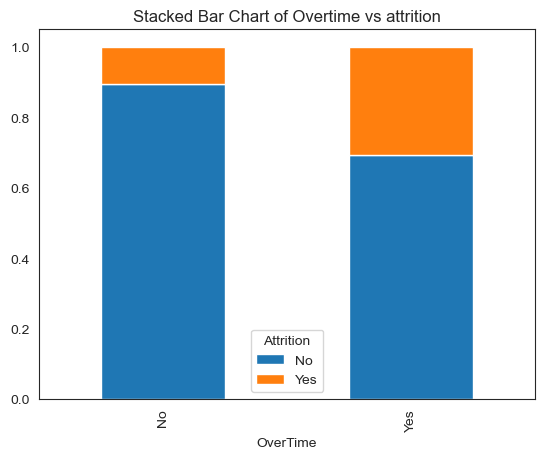

In [16]:
# Stacked bar chart of  OverTime vs attrition
table=pd.crosstab(df.OverTime, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Overtime vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

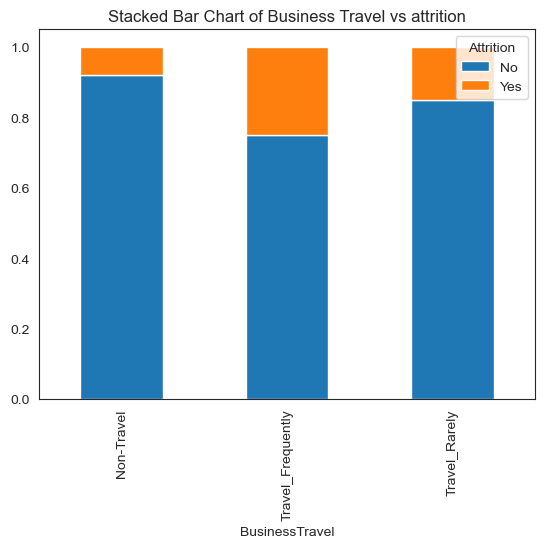

In [17]:
# Stacked bar chart of  BusinessTravel vs attrition
table=pd.crosstab(df.BusinessTravel, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')
    

Text(0.5, 1.0, 'Stacked bar chart of  YearsSinceLastPromotion vs attrition')

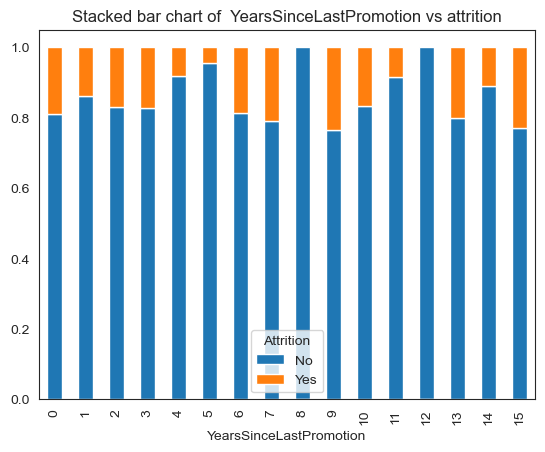

In [18]:
# Stacked bar chart of  YearsSinceLastPromotion vs attrition
table=pd.crosstab(df.YearsSinceLastPromotion, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar chart of  YearsSinceLastPromotion vs attrition')

<AxesSubplot:xlabel='Age', ylabel='count'>

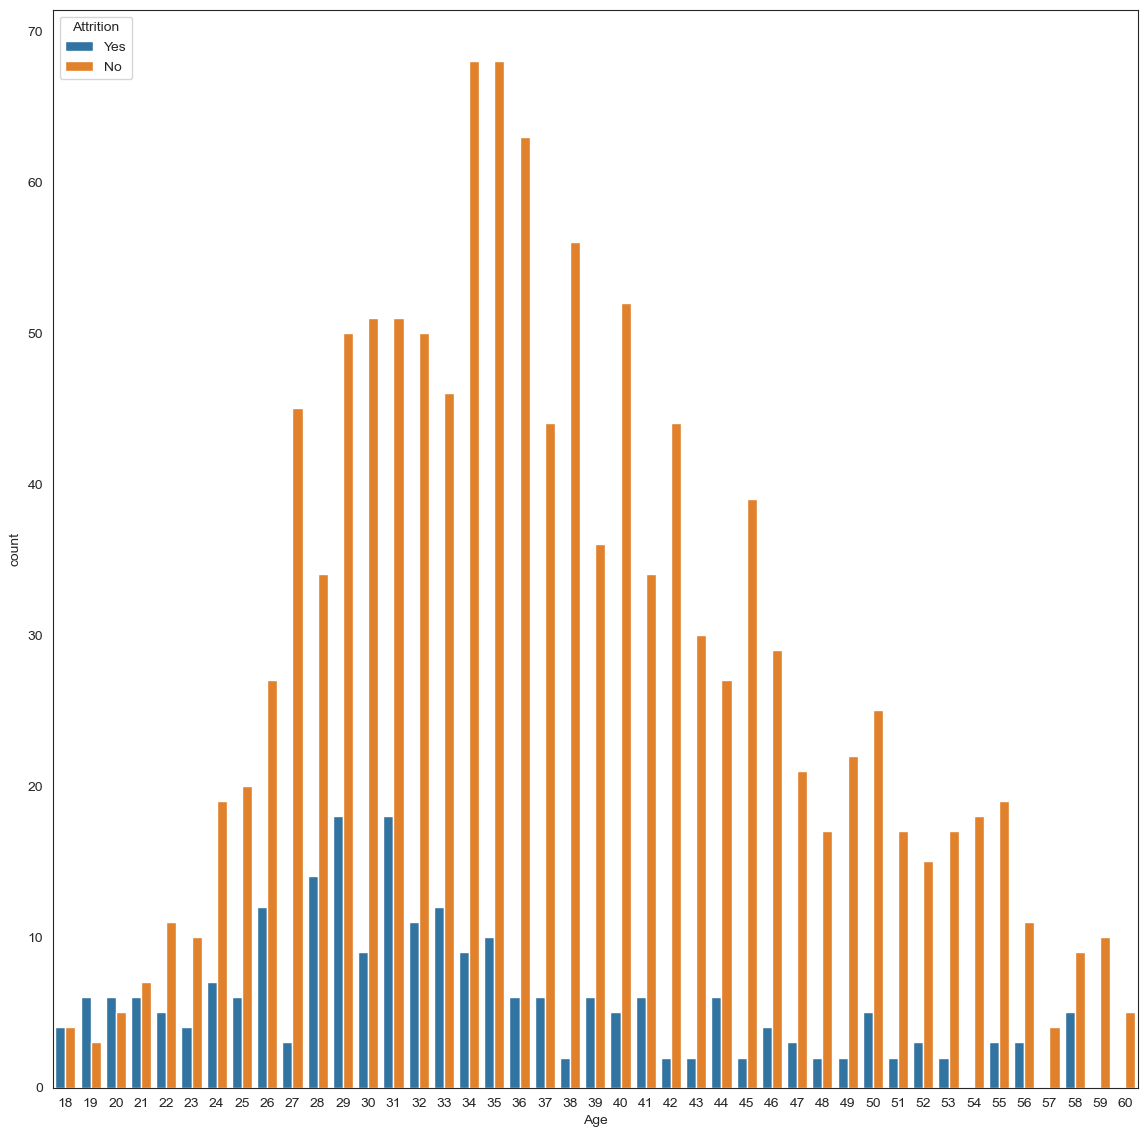

In [19]:
# Graph showing how age wise employee attrition 
plt.figure(figsize=(14,14)) 
sns.countplot(x='Age',hue='Attrition',data=df)

# 4. Feature Engineering <a id='feature_eng'></a>

In [20]:
# Dropping the columns which are not required
df=df.drop('EmployeeCount',axis=1)
df=df.drop('EmployeeNumber',axis=1)
df=df.drop('StandardHours',axis=1)
df=df.drop('Over18',axis=1)

<AxesSubplot:>

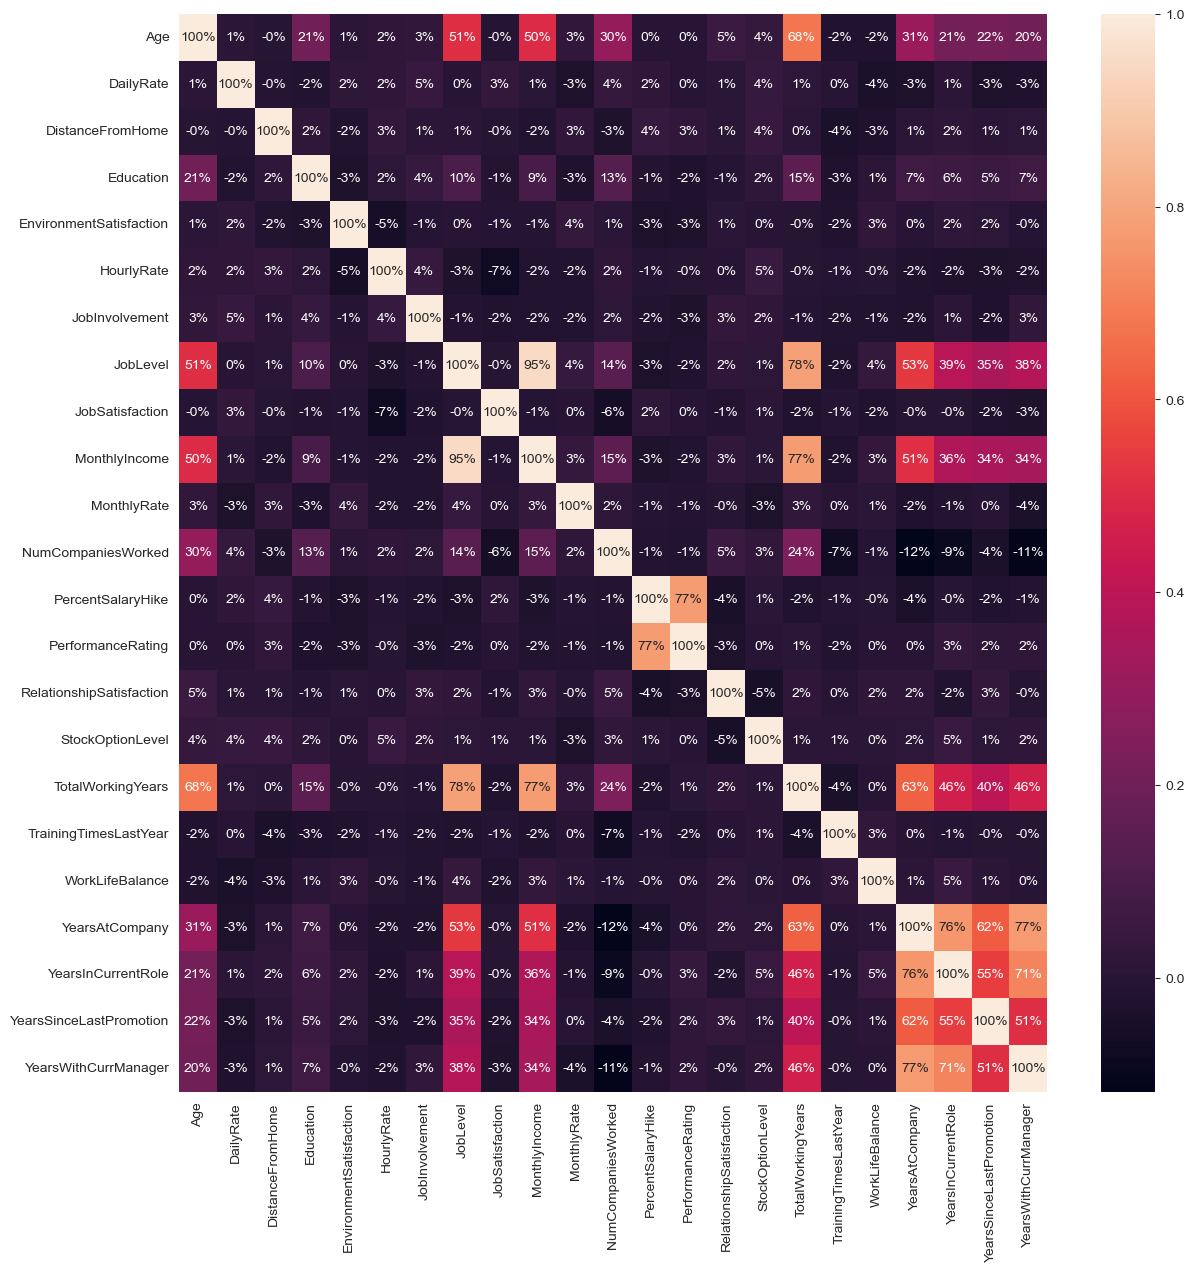

In [21]:
# To see correlation between the columns in Heatmap graph
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True,fmt='.0%')

In [22]:
# Label encoding for the columns which are not numeric.
for column in df.columns:
    if df[column].dtype.kind in 'if':
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

In [23]:
#Converting the age column into age group & dropping the age column
df['Agegroup']=df['Age']
df=df.drop('Age',axis=1)
df.head(2)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Agegroup
0,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,49


In [24]:
# Checking the shape of X and Y
df.shape[0]

1470

# 5. Model <a id='model'></a>

In [25]:
# Splitting the data into train and test
X = df.iloc[:, 1:df.shape[1]].values 
y= df.iloc[:, 0].values

### 5.1 Over sampling <a id='sampling'></a>
Over Sampling of minority class data using random sampling 

In [26]:
X_df = pd.DataFrame(X, columns=df.columns[1:])
ros = RandomOverSampler(random_state=42)
X_resampled, Y = ros.fit_resample(X_df, y)
X = pd.DataFrame(X_resampled, columns=X_resampled.columns)

### 5.2 Splitting data & Training <a id='train'></a>

In [27]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [28]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  Y_pred = model.predict(X_test)
  print("Accuracy: ",accuracy_score(Y_test,Y_pred))
  print("Precision: ",precision_score(Y_test,Y_pred))
  print("Recall: ",recall_score(Y_test,Y_pred))
  print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))

In [29]:
#Fitting Random Forest Classification to the Training set
forest=RandomForestClassifier(n_estimators=13,random_state =2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=13, random_state=2)

In [30]:
#Predicting the  results on train set
forest.score(X_train,Y_train)

0.9989183342347214

In [31]:
train_predict_evaluate(forest,X_train,Y_train,X_test)

Accuracy:  0.9546191247974068
Precision:  0.9289940828402367
Recall:  0.9874213836477987
Confusion Matrix:
 [[275  24]
 [  4 314]]


# 6. Hyperparameter Tuning <a id='ht'></a>


It is methods that involves adjusting parameters in a machine learning algorithm to optimize performance on a specific task, using a validation set or cross-validation.

### 6.1 Randomized Search Cross Validation <a id='rsv'></a>

It is a hyperparameter tuning technique,which randomly selects combinations of hyperparameters to train and evaluate a model using cross-validation, optimizing performance without exhaustively searching all possibilities.

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Taking a huge range of values to get nearer to optimal parameters

# Parameters to check
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [33]:
# Using the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

In [34]:
train_predict_evaluate (rf_random, X_train, Y_train, X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy:  0.9902755267423015
Precision:  0.984472049689441
Recall:  0.9968553459119497
Confusion Matrix:
 [[294   5]
 [  1 317]]


In [35]:
# Finding the best parameters
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 87,
 'bootstrap': False}

Above is the Best parameter that is found using randomized CV 

### 6.2 Grid Search Cross Validation <a id='grid'></a>

Grid Search Cross Validation is a technique for hyperparameter tuning  that involves systematically searching through a specified subset of hyperparameters to find the best combination that results in the highest model performance, using cross-validation to assess the effectiveness of each combination.

In [36]:
from sklearn.model_selection import GridSearchCV

# After getting near to optimal values, using Random Search CV, 
# we now check for close values using Grid Search CV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [100, 105, 110, 115],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [250,300,350,400]
}

In [37]:
# Grid Search model
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Results on the Grid Search model
train_predict_evaluate (grid_search, X_train, Y_train, X_test)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Accuracy:  0.9821717990275527
Precision:  0.9694189602446484
Recall:  0.9968553459119497
Confusion Matrix:
 [[289  10]
 [  1 317]]


In [38]:
# Finding the best parameters
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 250}

Now we've got best parameters from both randomized & grid search cv

In [39]:
# Hyperparameter Tuning done
# Best parameters found above
# Using these parameters on our Random Forest model for most optimal results
best_rf = RandomForestClassifier(bootstrap=False, max_depth=100, 
                                 min_samples_leaf=1,min_samples_split=2, 
                                 n_estimators=250, random_state=42)
train_predict_evaluate (best_rf, X_train, Y_train, X_test)

Accuracy:  0.9854132901134521
Precision:  0.9753846153846154
Recall:  0.9968553459119497
Confusion Matrix:
 [[291   8]
 [  1 317]]


### 6.3 K-Fold Cross Validation <a id='kfold'</a>

K-Fold Cross Validation is a technique for assessing the performance that involves dividing the dataset into K equally sized folds, training the model on K-1 folds and validating it on the remaining fold. This process is repeated K times, with each fold used once as the validation data, and the results are averaged to obtain an estimate of the model's performance.

In [40]:
# Function for accuracy metrics using the parameters on our  model with 5 fold cross validation.
def cross_validation(model,X,Y):
  scores = cross_validate(model, X, Y, cv=5,scoring=('accuracy','precision','recall','f1'))

  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))

In [41]:
# On model without Hyperparameter Tuning
cross_validation(forest, X, Y)

Accuracy:  0.9647214854111406
Precision:  0.9361431573964445
Recall:  0.9975708502024292
F1 Score:  0.9658587703627844


# 7. Result <a id='result'></a>

### 7.1 Performace Metrics <a id='metrics'></a>

In [42]:
# On model with Hyperparameter Tuning
cross_validation(best_rf, X, Y)

Accuracy:  0.9906734772647017
Precision:  0.9840374758033296
Recall:  0.9975708502024292
F1 Score:  0.9907377799504001


### 7.2 Feature Importance <a id='feature'></a>

In [43]:
# Finding the importance of each feature in the model
# Sorting based on decreasing importance
feature_imp = pd.Series(best_rf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
print(feature_imp)

MonthlyIncome              0.08
OverTime                   0.07
Agegroup                   0.06
DailyRate                  0.05
TotalWorkingYears          0.05
HourlyRate                 0.05
MonthlyRate                0.04
YearsAtCompany             0.04
YearsWithCurrManager       0.04
DistanceFromHome           0.04
StockOptionLevel           0.04
NumCompaniesWorked         0.04
EnvironmentSatisfaction    0.03
PercentSalaryHike          0.03
YearsInCurrentRole         0.03
JobSatisfaction            0.03
JobRole                    0.03
JobLevel                   0.03
RelationshipSatisfaction   0.02
YearsSinceLastPromotion    0.02
MaritalStatus              0.02
TrainingTimesLastYear      0.02
EducationField             0.02
JobInvolvement             0.02
WorkLifeBalance            0.02
Education                  0.02
Department                 0.02
BusinessTravel             0.01
Gender                     0.01
PerformanceRating          0.00
dtype: float64


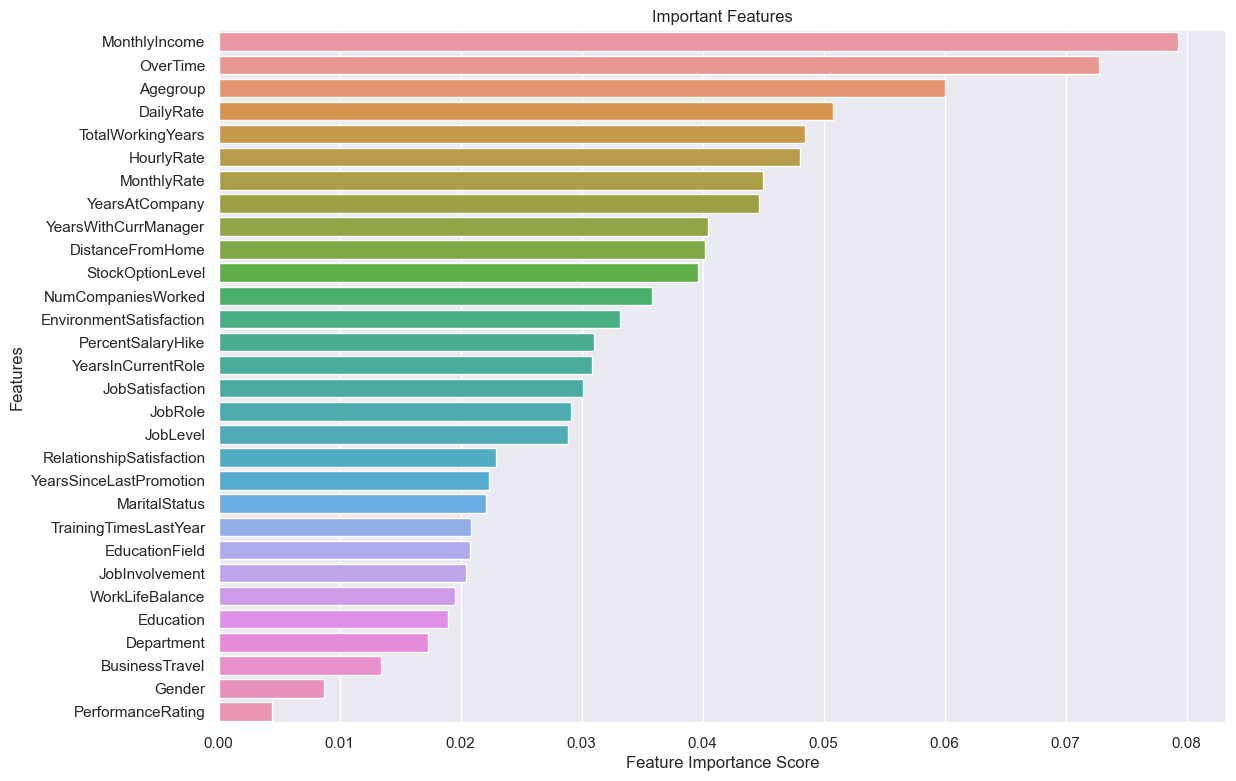

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot using sns
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")

# Displaying the plot
plt.show()